<a href="https://colab.research.google.com/github/mohannashahrad/Borealis_AI_Plant_Tree_Project/blob/main/Training/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# Imort all the required libraries
import pandas as pd
import requests
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import numpy as np
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Functions

def load_DF(url):
  data = StringIO(requests.get(url).text)
  return pd.read_csv(data)

In [54]:
# Loading Final DataSet
df = load_DF('https://raw.githubusercontent.com/mohannashahrad/Borealis_AI_Plant_Tree_Project/main/Final_Data/final_data.csv')
df = df.iloc[: , 1:]
display(df.head())

,Country,Time,Population,Pop Growth (%),Urban Pop (%),Land Area (m2),Agriculture Land (%),Forest Land (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv)
0,Afghanistan,1990,12412311.0,4.476954,21.177,652860.0,58.266703,1.850994,NaN,NaN,NaN,NaN,NaN,2960.0,15180.0
1,Afghanistan,1991,13299016.0,6.900124,21.266,652860.0,58.251386,1.850994,NaN,NaN,NaN,NaN,NaN,2740.0,15100.0
2,Afghanistan,1992,14485543.0,8.546107,21.355,652860.0,58.251386,1.850994,NaN,NaN,NaN,NaN,NaN,1430.0,13630.0
3,Afghanistan,1993,15816601.0,8.790897,21.444,652860.0,58.104341,1.850994,NaN,NaN,NaN,NaN,NaN,1360.0,13460.0
4,Afghanistan,1994,17075728.0,7.659796,21.534,652860.0,57.919003,1.850994,NaN,NaN,NaN,NaN,NaN,1300.0,13270.0


In [55]:
# One-hot encoding on Country column
discrete_columns = ["Country"]

for var in discrete_columns:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(df[[var]]).toarray())
    enc_df.columns = enc.get_feature_names([var])
    df = df.join(enc_df)
    df = df.drop([var], axis=1)

display(df.head())    

,Time,Population,Pop Growth (%),Urban Pop (%),Land Area (m2),Agriculture Land (%),Forest Land (%),GDP (US$),GDP Growth (%),Forest Rents (% GDP),Coal Rents (% GDP),Oil Rents (% GDP),CO2 Emission (kt),GHG Emision (CO2 eqv),Country_Afghanistan,Country_Africa Eastern and Southern,Country_Africa Western and Central,Country_Albania,Country_Algeria,Country_American Samoa,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Arab World,Country_Argentina,Country_Armenia,Country_Aruba,Country_Australia,Country_Austria,Country_Azerbaijan,"Country_Bahamas, The",Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bermuda,Country_Bhutan,...,Country_St. Lucia,Country_St. Martin (French part),Country_St. Vincent and the Grenadines,Country_Sub-Saharan Africa,Country_Sub-Saharan Africa (IDA & IBRD countries),Country_Sub-Saharan Africa (excluding high income),Country_Sudan,Country_Suriname,Country_Sweden,Country_Switzerland,Country_Syrian Arab Republic,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_Timor-Leste,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Turks and Caicos Islands,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Upper middle income,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,"Country_Venezuela, RB",Country_Vietnam,Country_Virgin Islands (U.S.),Country_West Bank and Gaza,Country_World,"Country_Yemen, Rep.",Country_Zambia,Country_Zimbabwe
0,1990,12412311.0,4.476954,21.177,652860.0,58.266703,1.850994,NaN,NaN,NaN,NaN,NaN,2960.0,15180.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1991,13299016.0,6.900124,21.266,652860.0,58.251386,1.850994,NaN,NaN,NaN,NaN,NaN,2740.0,15100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1992,14485543.0,8.546107,21.355,652860.0,58.251386,1.850994,NaN,NaN,NaN,NaN,NaN,1430.0,13630.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1993,15816601.0,8.790897,21.444,652860.0,58.104341,1.850994,NaN,NaN,NaN,NaN,NaN,1360.0,13460.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994,17075728.0,7.659796,21.534,652860.0,57.919003,1.850994,NaN,NaN,NaN,NaN,NaN,1300.0,13270.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


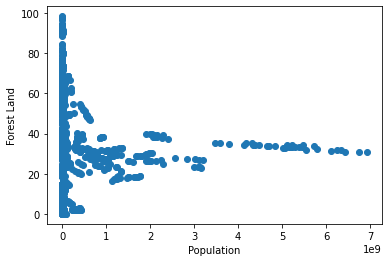

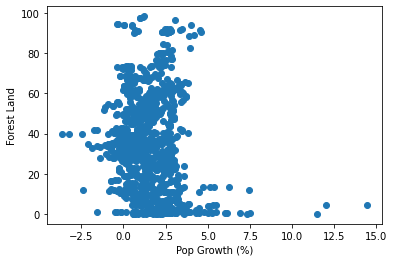

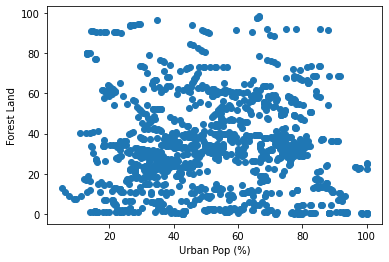

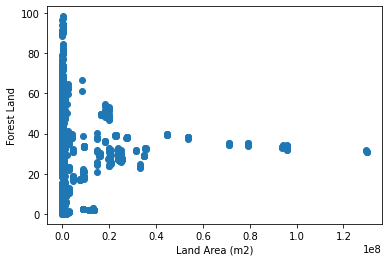

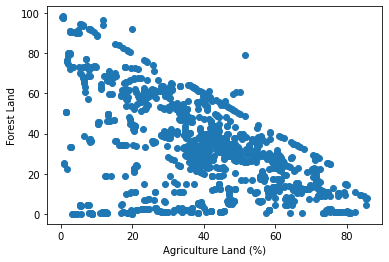

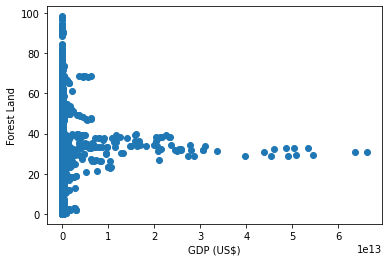

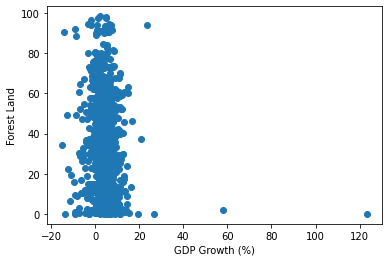

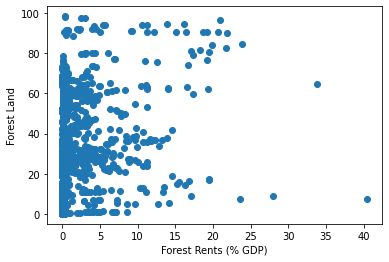

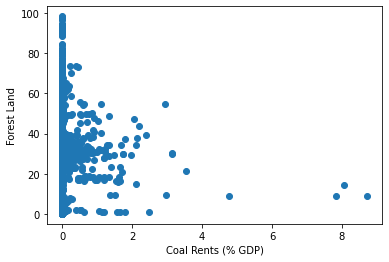

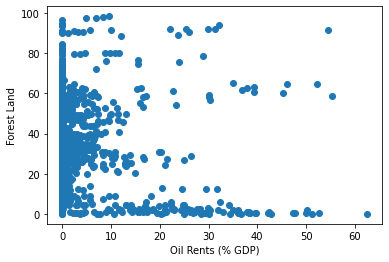

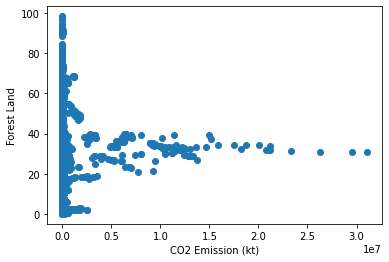

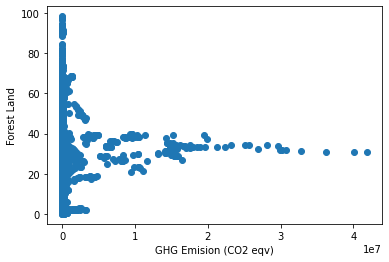

In [57]:
# Plotting 
features = ['Population', 'Pop Growth (%)', 'Urban Pop (%)', 'Land Area (m2)', 'Agriculture Land (%)', 'GDP (US$)', 
            'GDP Growth (%)', 'Forest Rents (% GDP)', 'Coal Rents (% GDP)', 'Oil Rents (% GDP)', 'CO2 Emission (kt)', 'GHG Emision (CO2 eqv)']

for f in features: 
  plt.scatter(X_test[f],y_test)
  plt.xlabel(f)
  plt.ylabel('Forest Land')
  plt.show()

In [58]:
# Splitting data set into train and test
print(df.shape)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
print(df.shape)
x = df.loc[:, df.columns != 'Forest Land (%)']
y = df['Forest Land (%)']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

(8246, 280)
(6251, 280)


In [59]:
# Training the LR Model

model = LinearRegression()  
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
compare_df = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
display(compare_df)

,Actual,Predicted
0,31.021033,32.181576
1,6.309531,7.201462
2,2.549039,1.670447
3,60.105322,58.548067
4,24.825396,23.274546
...,...,...
1246,12.929709,12.092305
1247,49.373648,50.892100
1248,0.454484,1.306802
1249,38.888152,39.030271


In [60]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score:', np.sqrt(metrics.r2_score(y_pred,y_test)))

Mean Absolute Error: 2.1610766456566446
Mean Squared Error: 11.227260341063277
Root Mean Squared Error: 3.3507104233376057
R2 score: 0.9889999665668534
